## P165- Hotel Rating Classification 

### Business Objective:

T and major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager   can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.


### Project Lifecycle:

- Data Analysis
- Feature Engineering
- Feature Extraction
- Model Building
- Model Deployment

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# warnings ignore
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Importing the data

data=pd.read_excel("C:/Users/anike/Downloads/hotel_reviews.xlsx",sheet_name='hotel_reviews')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
# Making copy of data

df=data.copy()
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [4]:
# Information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
# Size and Shape of data:

print(df.size)
print('-------')
print(df.shape)

40982
-------
(20491, 2)


In [72]:
# Null values

df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [6]:
# Checking duplicate entry

df[df.duplicated()]

,Review,Rating


In [30]:
# Checking the counts of rating

df['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

<AxesSubplot:>

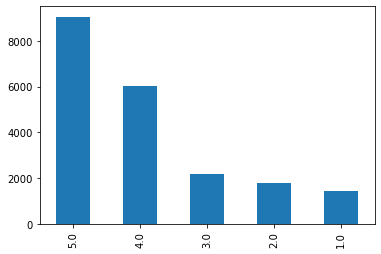

In [94]:
# Bar plot

df['Rating'].value_counts().plot(kind='bar')

As with repect to bar plot we can see that most of the ratings lies at 5 as compared to others.

In [5]:
# Hence the rating should be in the positive or negative form so we are going to define a function against it,
# So our rating should be in that form.

def f(row):
    if row['Rating'] == 3.0:
        val = 'Neutral'
    elif row['Rating'] == 1.0 or row['Rating'] == 2.0:
        val = 'Negative'
    elif row['Rating'] == 4.0 or row['Rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1.0
    return val

In [6]:
# Creating the new Sentiment column with respect to ratings

df['Feedback'] = df.apply(f, axis=1)
df.head()

,Review,Rating,Feedback
0,nice hotel expensive parking got good deal sta...,4,Positive
1,ok nothing special charge diamond member hilto...,2,Negative
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral
3,"unique, great stay, wonderful time hotel monac...",5,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive


<AxesSubplot:>

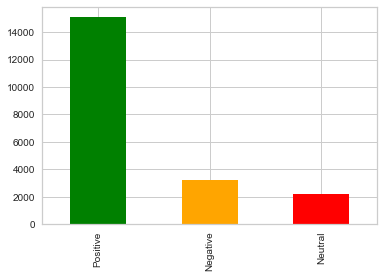

In [137]:
# Bar plot with respect to sentiments

df['Feedback'].value_counts().plot(kind='bar',color=['Green','Orange','Red'])

As by seeing the bar chart we can see that the count of 'Positive' reviews are more as compared to 'Neutral' and 'Negative' reviews.

In [7]:
# Clarifing the length of the text

df['Length of text']=df['Review'].apply(len)
df

,Review,Rating,Feedback,Length of text
0,nice hotel expensive parking got good deal sta...,4,Positive,593
1,ok nothing special charge diamond member hilto...,2,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281
...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,733
20487,great location price view hotel great quick pl...,4,Positive,306
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,443
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,5557


<AxesSubplot:xlabel='Length of text'>

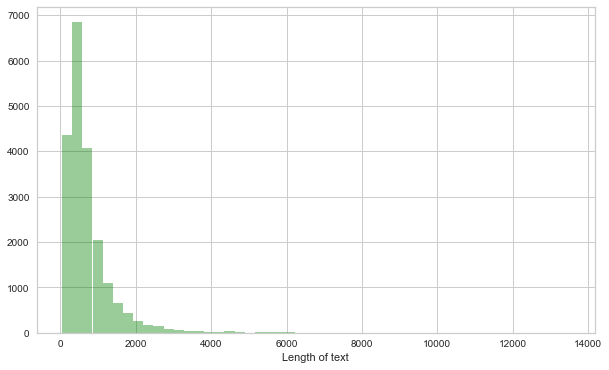

In [210]:
# Distplot with respect to length of text

plt.figure(figsize=(10,6))
sns.distplot(df['Length of text'],kde=False,color='green')

As by seeing the distplot we can say that the length of the text lies mostly in 100 to 1500 words and it is right hand skewed.

## Preprocessing of Data

Preprocessing steps:

1.Contraction Mapping /Expanding contractions

2.Tokenization

3.Noise Cleaning / Punctuations

4.Stop words removing

5.Stemming And Lemmatization

### 1. Contraction Mapping / Expanding Contractions

Contractions are a shortened version of words or a group of words, quite common in both spoken and written language. In English, they are quite common, such as I will to I’ll, I have to I’ve , do not to don’t, etc. Mapping these contractions to their expanded form helps in text standardization.

In [39]:
!pip install contractions

In [8]:
import contractions

In [9]:
df['No_Contraction']=df['Review'].apply(lambda x:[contractions.fix(word) for word in x.split()])
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam..."


In [10]:
df["Join_contraction"] = [' '.join(map(str, l)) for l in df['No_Contraction']]
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso..."


### 2.Tokenization

Tokenization is the process of separating a piece of text into smaller units called tokens. Given a document, tokens can be sentences, words, subwords, or even characters depending on the application.

In [11]:
# Importing the libraries for tokenization

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [143]:
# Just applying tokenization on one example

txt="Hi, How are you?"
print(word_tokenize(txt))

['Hi', ',', 'How', 'are', 'you', '?']


In [12]:
# Creating a new column Tokenized and applying the tokenization on it.

df['Tokenized'] = df['Join_contraction'].apply(word_tokenize)
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g..."


### 3. Noise Cleaning / Punctuations (spacing, special characters can be removed)

Special characters and symbols contribute to extra noise in unstructured text. Using regular expressions to remove them or using tokenizers, which do the pre-processing step of removing punctuation marks and other special characters, is recommended.

In [13]:
# Making all the tokenized words in lower case

df['Lower_case'] = df['Tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g..."


#### Punctuations removing

In [14]:
# Importing the libraries for Punctuation

import string
punc = string.punctuation

# Creating a new column No_punctuation and removing the space/special characters/spacing etc.. on Lower_case column

df['No_punctuation'] = df['Lower_case'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game..."


In [15]:
df["Cleaned_Data"] = [' '.join(map(str, l)) for l in df['No_punctuation']]
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...


### 4. Stop words removing

Stop words are those words which are very common and often less significant. Hence, removing these is a pre-processing step as well. This can be done explicitly by retaining only those words in the document which are not in the list of stop words or by specifying the stop word list as an argument in CountVectorizer or TfidfVectorizer methods when getting Bag-of-Words(BoW)/TF-IDF scores for the corpus of text documents.

In [16]:
# Importing the libraries for Stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


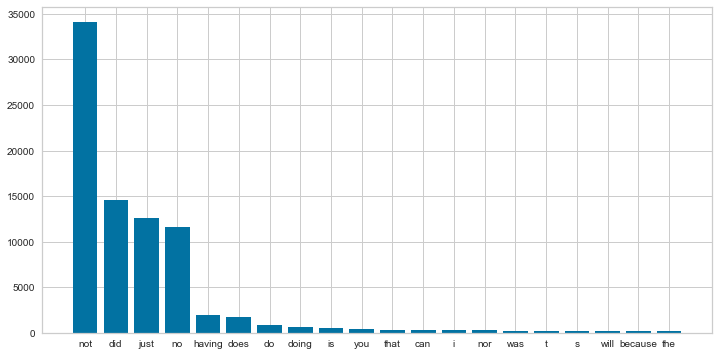

In [87]:
# Before removing checking occurances of stopwords in headline


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
    x,y=zip(*top)
    plt.figure(figsize=(12,6))
    plt.bar(x,y)

plot_top_stopwords_barchart(df['Cleaned_Data'])

As by see the bar graph we can say that ,there more number of 'not' stopwords as compared to others. 

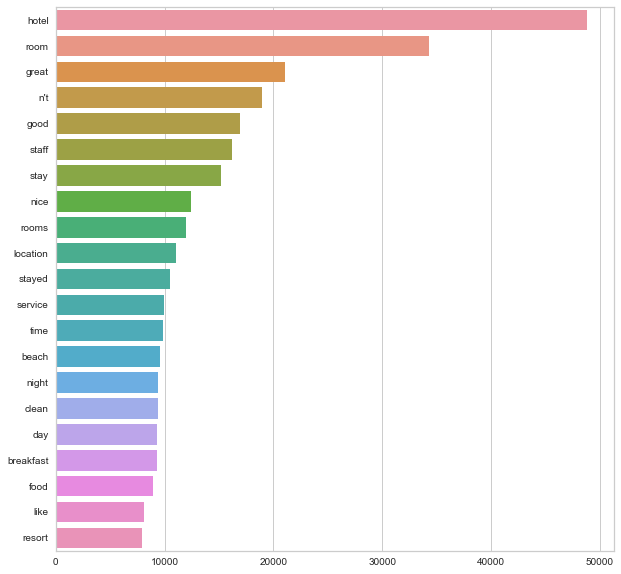

In [88]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:25]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['Cleaned_Data'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

As by this graph we can say that there are more number of 'hotel' non-stopwords as compared to others, and beside this we can see that n't it is not expanded so in order to clear it we will define a function so it will became 'not'.

In [17]:
# #creating a user defined function for text cleaning
import re

def text_clean(text):
    
    text=re.sub("n't","not",text)
    
    return text

In [18]:
df['Cleaned_Data'] = df['Cleaned_Data'].apply(text_clean)
df

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...
...,...,...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5,Positive,733,"[best, kept, secret, 3rd, time, staying, charm...","best kept secret 3rd time staying charm, not 5...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm...","[best, kept, secret, 3rd, time, staying, charm...",best kept secret 3rd time staying charm not 5-...
20487,great location price view hotel great quick pl...,4,Positive,306,"[great, location, price, view, hotel, great, q...",great location price view hotel great quick pl...,"[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...","[great, location, price, view, hotel, great, q...",great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2,Negative,443,"[ok, just, looks, nice, modern, outside,, desk...","ok just looks nice modern outside, desk staff ...","[ok, just, looks, nice, modern, outside, ,, de...","[ok, just, looks, nice, modern, outside, ,, de...","[ok, just, looks, nice, modern, outside, desk,...",ok just looks nice modern outside desk staff n...
20489,hotel theft ruined vacation hotel opened sept ...,1,Negative,5557,"[hotel, theft, ruined, vacation, hotel, opened...",hotel theft ruined vacation hotel opened sept ...,"[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...","[hotel, theft, ruined, vacation, hotel, opened...",hotel theft ruined vacation hotel opened sept ...


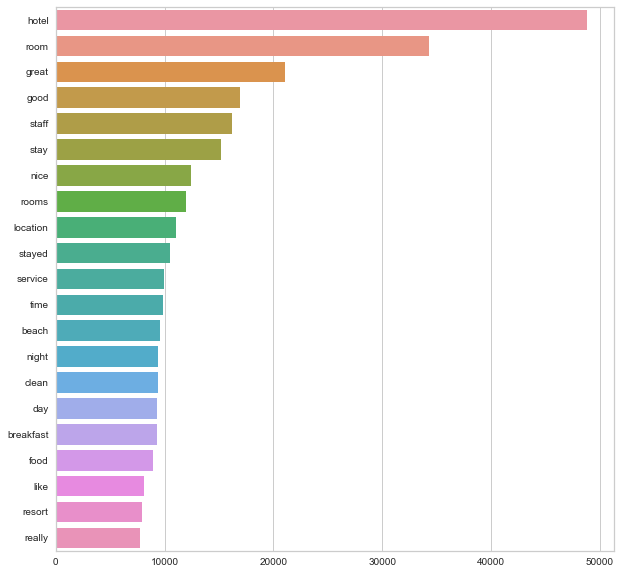

In [93]:
import seaborn as sns
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:25]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['Cleaned_Data'])

# Explore more such analysis here - https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

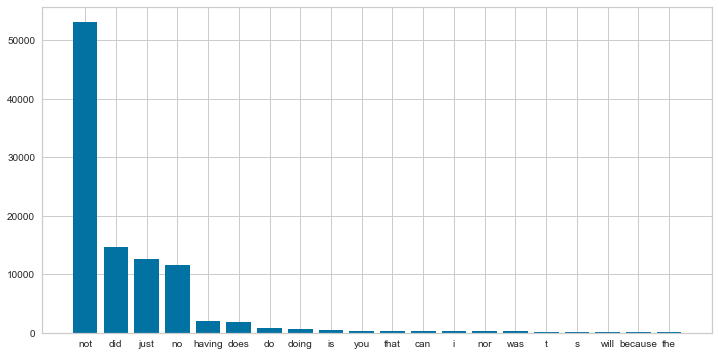

In [94]:
# Before removing checking occurances of stopwords in headline


def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]
    x,y=zip(*top)
    plt.figure(figsize=(12,6))
    plt.bar(x,y)

plot_top_stopwords_barchart(df['Cleaned_Data'])

In [19]:

df['Cleandata_Tokenized'] = df['Cleaned_Data'].apply(word_tokenize)
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."


In [20]:
# Creating a new column Stopwords_removed and removing the stopwords on No_punctuation column

df['Stopwords_removed'] = df['Cleandata_Tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."


#### Providing parts of speech_tags to words

Parts of speech (POS) are specific lexical categories to which words are assigned, based on their role and context in a given sentence

In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
df['Parts of speech_tags'] =df['Stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[(nice, JJ), (rooms, NNS), (4, CD), (experienc..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ..."


We are going to be using NLTK’s word lemmatizer which needs the parts of speech tags to be converted to wordnet’s format. We’ll write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion.

In [117]:
!pip install -U yellowbrick

In [99]:
# for sake of simplicity, showing 10 titles based on the same seed value at 5
tagged_stanzas = []
tagged = []

for word in df['Stopwords_removed'].sample(5, random_state = 5):
     tagged_word = nltk.pos_tag(word)
print(tagged_word)

tagged_stanzas.append(tagged_word)

# This format is needed for below visualizer as in takes only two values. If you skip this format, it might give you - "too many values to unpack error" 
tagged.append(tagged_stanzas)

[('amazing', 'VBG'), ('loved', 'VBD'), ('loved', 'VBN'), ('loved', 'JJ'), ('wish', 'JJ'), ('sleep', 'NN'), ('westin', 'NN'), ('bed', 'VBD'), ('night', 'NN'), ('staying', 'VBG'), ('look', 'NN'), ('westin', 'JJ'), ('hotel', 'NN'), ('time', 'NN'), ('stayed', 'JJ'), ('great', 'JJ'), ('great', 'JJ'), ('location', 'NN'), ('ca', 'MD'), ('wrong', 'VB'), ('staying', 'VBG'), ('beds', 'NNS'), ('really', 'RB'), ('comfy', 'JJ'), ('slept', 'NN'), ('good', 'JJ')]


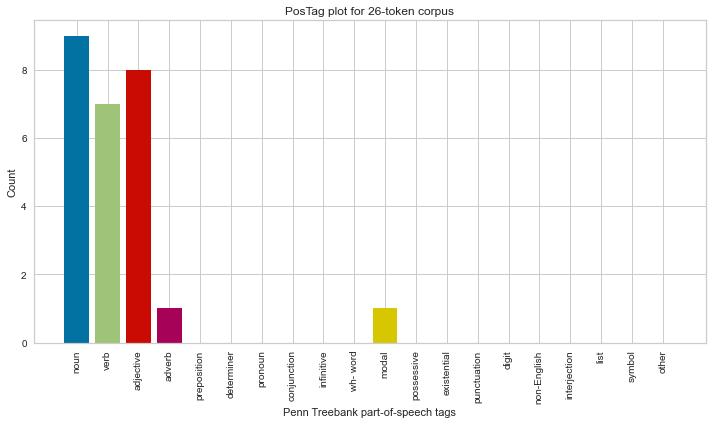

<AxesSubplot:title={'center':'PosTag plot for 26-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [100]:
# Create the visualizer

from yellowbrick.text import PosTagVisualizer
plt.figure(figsize=(10,6))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

NLTK’s lemmatizer requires Parts of speech_tags to be converted to wordnet’s format. We’ll write a function that makes the conversion.

In [23]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [25]:
df['Wordnet_pos'] = df['Parts of speech_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[(nice, a), (hotel, n), (expensive, a), (parki..."
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[(ok, a), (nothing, n), (special, a), (charge,..."
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[(nice, JJ), (rooms, NNS), (4, CD), (experienc...","[(nice, a), (rooms, n), (4, n), (experience, n..."
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde...","[(unique, a), (great, a), (stay, n), (wonderfu..."
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ...","[(great, a), (stay, n), (great, a), (stay, n),..."


In [26]:
df["Stoppedwords_join"] = [' '.join(map(str, l)) for l in df['Stopwords_removed']]
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[(nice, a), (hotel, n), (expensive, a), (parki...",nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[(ok, a), (nothing, n), (special, a), (charge,...",ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[(nice, JJ), (rooms, NNS), (4, CD), (experienc...","[(nice, a), (rooms, n), (4, n), (experience, n...",nice rooms 4 experience hotel monaco seattle g...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde...","[(unique, a), (great, a), (stay, n), (wonderfu...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ...","[(great, a), (stay, n), (great, a), (stay, n),...",great stay great stay went seahawk game awesom...


### 5. Stemming And Lemmatization

Both stemming and lemmatization are methods to reduce words to their base form. While stemming follows certain rules to truncate the words to their base form, often resulting in words that are not lexicographically correct, lemmatization always results in base forms that are lexicographically correct. However, stemming is a lot faster than lemmatization. Hence, to stem/lemmatize is dependent on whether the application needs quick pre-processing or requires more accurate base forms.

#### Stemming

In [27]:
# Importing stemming libraries

from nltk.stem import PorterStemmer
st = PorterStemmer()

# Creating the new Stemming column with respect stopwords_join column and joining data respectively

df['Stemming']=df["Stoppedwords_join"].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[(nice, a), (hotel, n), (expensive, a), (parki...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[(ok, a), (nothing, n), (special, a), (charge,...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[(nice, JJ), (rooms, NNS), (4, CD), (experienc...","[(nice, a), (rooms, n), (4, n), (experience, n...",nice rooms 4 experience hotel monaco seattle g...,nice room 4 experi hotel monaco seattl good ho...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde...","[(unique, a), (great, a), (stay, n), (wonderfu...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ...","[(great, a), (stay, n), (great, a), (stay, n),...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


In [28]:
# Clarifying the results

df.iloc[0:5,[-1,-2]]

,Stemming,Stoppedwords_join
0,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...
1,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,nice room 4 experi hotel monaco seattl good ho...,nice rooms 4 experience hotel monaco seattle g...
3,uniqu great stay wonder time hotel monaco loca...,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


#### Lemmatization

In [29]:
# Importing Lemmatization libraries

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Creating the new Lemmatization column with respect stopwords_join column and joining data respectively

df['Lemmatization']=df["Stoppedwords_join"].apply(lambda x: " ".join([wordnet_lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[(nice, a), (hotel, n), (expensive, a), (parki...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[(ok, a), (nothing, n), (special, a), (charge,...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,1427,"[nice, rooms, not, 4*, experience, hotel, mona...",nice rooms not 4* experience hotel monaco seat...,"[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, *, experience, hotel, mo...","[nice, rooms, not, 4, experience, hotel, monac...",nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, rooms, 4, experience, hotel, monaco, se...","[(nice, JJ), (rooms, NNS), (4, CD), (experienc...","[(nice, a), (rooms, n), (4, n), (experience, n...",nice rooms 4 experience hotel monaco seattle g...,nice room 4 experi hotel monaco seattl good ho...,nice room 4 experience hotel monaco seattle go...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,"[unique,, great, stay,, wonderful, time, hotel...","unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, ,, great, stay, ,, wonderful, time, h...","[unique, great, stay, wonderful, time, hotel, ...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[unique, great, stay, wonderful, time, hotel, ...","[(unique, JJ), (great, JJ), (stay, NN), (wonde...","[(unique, a), (great, a), (stay, n), (wonderfu...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,"[great, stay, great, stay,, went, seahawk, gam...","great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, ,, went, seahawk, g...","[great, stay, great, stay, went, seahawk, game...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[(great, JJ), (stay, NN), (great, JJ), (stay, ...","[(great, a), (stay, n), (great, a), (stay, n),...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


In [30]:
import nltk
nltk.download('omw-1.4')  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
# Clarifying the results

df.iloc[0:5,[-1,-2,-3]]

,Lemmatization,Stemming,Stoppedwords_join
0,nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,nice room 4 experience hotel monaco seattle go...,nice room 4 experi hotel monaco seattl good ho...,nice rooms 4 experience hotel monaco seattle g...
3,unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...


## Feature Extraction

Types :

1.Binary weights

2.Bag of words(countvectorizer)

3.TF-IDF(Term frequency-Inverse document frequency)

4.N-Grams

#### Bag of words(CountVectorizer)

Bag of Words is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

1. Bi-Grams 

In [32]:
# Importing the library 

from nltk.probability import FreqDist

In [33]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for bi-gram, put ngram_range=(2,2)
            max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [34]:
# top 20 Bi-gram words

from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(df["Lemmatization"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
top2_df.head(10)

,Bi-gram,Frequency
0,great location,2206
1,staff friendly,2175
2,room clean,1758
3,punta cana,1727
4,minute walk,1644
5,hotel great,1498
6,great hotel,1488
7,walking distance,1477
8,friendly helpful,1430
9,recommend hotel,1359


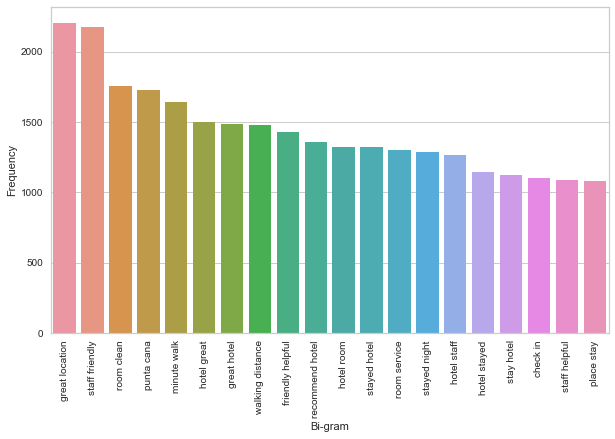

In [46]:
# Visualising the Bi-gram words with the help of bar-chart

top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 6))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Frequency"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

As we can see with the help of the Bi-gram graph that the combination of two words like 'great location' has highest number of frequency counts as compared to others.

2.Tri-Grams

In [35]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [36]:
# top 20 Tri-gram words

top3_words = get_top_n3_words(df["Lemmatization"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
top3_df.head(10)

,Tri-gram,Frequency
0,staff friendly helpful,779
1,hotel great location,559
2,old san juan,364
3,10 minute walk,343
4,highly recommend hotel,322
5,flat screen tv,312
6,great place stay,282
7,king size bed,279
8,stayed hotel night,246
9,good value money,233


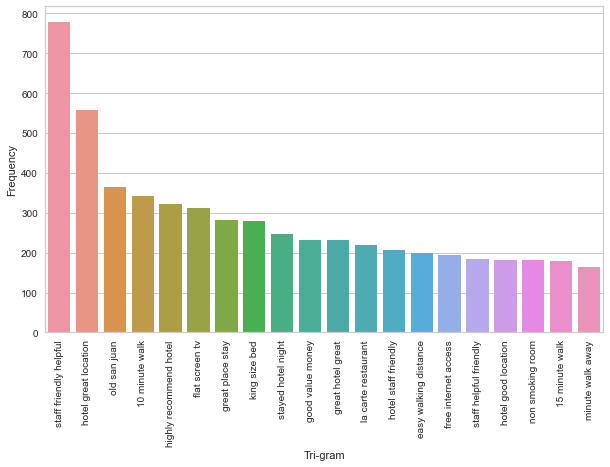

In [116]:
# Visualising the Tri-gram words with the help of bar-chart

top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 6))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Frequency"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

As we can see with the help of the Tri-gram graph that the combination of three words like 'staff friendly helpful' has highest number of frequency counts as compared to others.

In [37]:
# Making a copy of a data

DATA=df.copy()
DATA.head(2)

,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization
0,nice hotel expensive parking got good deal sta...,4,Positive,593,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expensive, parking, got, good, d...","[(nice, JJ), (hotel, NN), (expensive, JJ), (pa...","[(nice, a), (hotel, n), (expensive, a), (parki...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,1689,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, nothing, special, charge, diamond, member...","[(ok, JJ), (nothing, NN), (special, JJ), (char...","[(ok, a), (nothing, n), (special, a), (charge,...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...


In [51]:
# DATA.to_csv('Preprocessing-text-EDA.csv')

In [118]:
# DATA.to_csv('NewPreprocessing-text-EDA.csv')

### Word Cloud

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is.

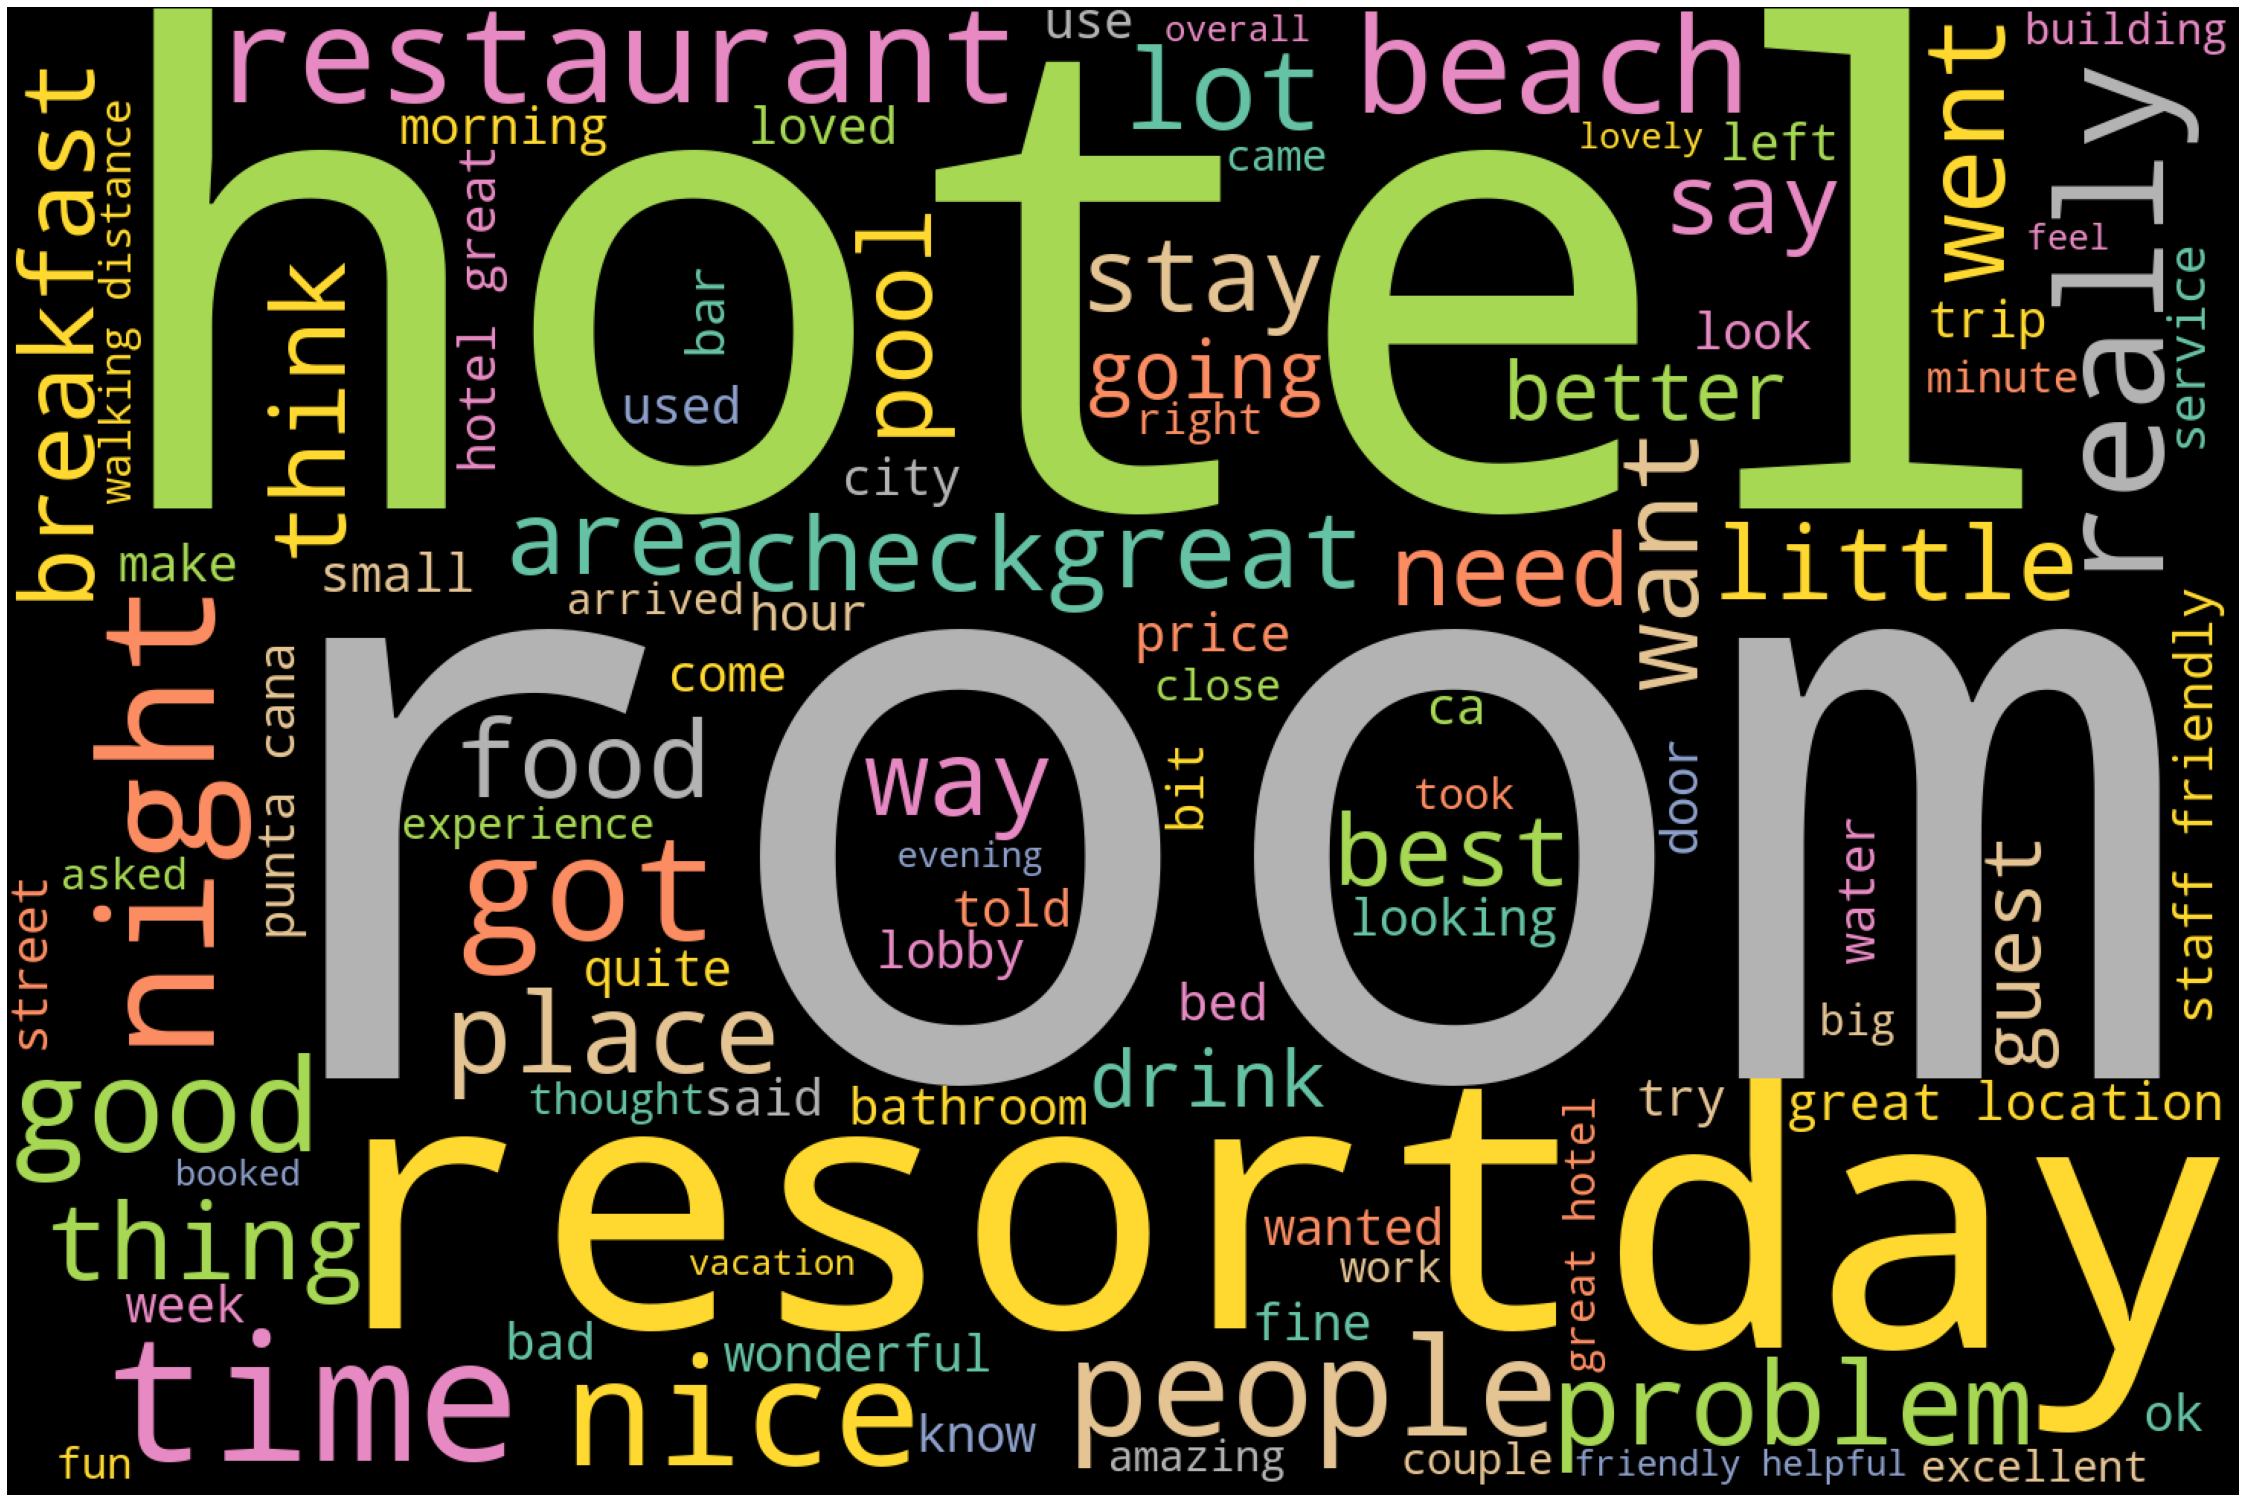

In [121]:
# Import packages

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(DATA['Cleaned_Data'])
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(40, 30))
    
    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off");
    
  
    
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 1500, height = 1000, background_color='black', 
                      max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

So here by seeing the word count we can say that 'hotel','room','day',resort'etc.. are some of the words which is more frequently used.

## Sentiment Analysis

In [38]:
# Importing the data

DF=pd.read_csv("C:/Users/anike/Downloads/NewPreprocessing-text-EDA.csv")
DF.head(3)

,Unnamed: 0,Review,Rating,Feedback,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization
0,0,nice hotel expensive parking got good deal sta...,4.0,Positive,593,"['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","[('nice', 'JJ'), ('hotel', 'NN'), ('expensive'...","[('nice', 'a'), ('hotel', 'n'), ('expensive', ...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...
1,1,ok nothing special charge diamond member hilto...,2.0,Negative,1689,"['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","[('ok', 'JJ'), ('nothing', 'NN'), ('special', ...","[('ok', 'a'), ('nothing', 'n'), ('special', 'a...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...
2,2,nice rooms not 4* experience hotel monaco seat...,3.0,Neutral,1427,"['nice', 'rooms', 'not', '4*', 'experience', '...",nice rooms not 4* experience hotel monaco seat...,"['nice', 'rooms', 'not', '4', '*', 'experience...","['nice', 'rooms', 'not', '4', '*', 'experience...","['nice', 'rooms', 'not', '4', 'experience', 'h...",nice rooms not 4 experience hotel monaco seatt...,"['nice', 'rooms', 'not', '4', 'experience', 'h...","['nice', 'rooms', '4', 'experience', 'hotel', ...","[('nice', 'JJ'), ('rooms', 'NNS'), ('4', 'CD')...","[('nice', 'a'), ('rooms', 'n'), ('4', 'n'), ('...",nice rooms 4 experience hotel monaco seattle g...,nice room 4 experi hotel monaco seattl good ho...,nice room 4 experience hotel monaco seattle go...


In [39]:
DF=DF.drop("Unnamed: 0",axis=1)
DF=DF.drop("Feedback",axis=1)
DF.head(2)

,Review,Rating,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization
0,nice hotel expensive parking got good deal sta...,4.0,593,"['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","[('nice', 'JJ'), ('hotel', 'NN'), ('expensive'...","[('nice', 'a'), ('hotel', 'n'), ('expensive', ...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,1689,"['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","[('ok', 'JJ'), ('nothing', 'NN'), ('special', ...","[('ok', 'a'), ('nothing', 'n'), ('special', 'a...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...


In [40]:
import textblob
from textblob import TextBlob

#### Polarity

- Polarity analysis takes into account the amount of positive or negative terms that appear in a given sentence
- As the polarity scores ranges between 0 to 1
- Below 0 it has a negative score and above 0 it has a positive score

In [41]:
DF['Polarity']=round(DF['Lemmatization'].apply(lambda x: TextBlob(x).sentiment.polarity),2)
DF[['Cleaned_Data','Polarity']].head(5)

,Cleaned_Data,Polarity
0,nice hotel expensive parking got good deal sta...,0.21
1,ok nothing special charge diamond member hilto...,0.24
2,nice rooms not 4 experience hotel monaco seatt...,0.29
3,unique great stay wonderful time hotel monaco ...,0.50
4,great stay great stay went seahawk game awesom...,0.47


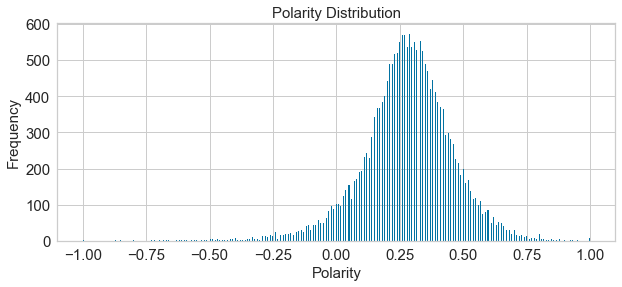

In [207]:
# Plotting histogram with respect to Polarity

plt.figure(figsize=(10,4))
plt.hist(DF['Polarity'],bins=500)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Polarity Distribution', fontsize=15)
plt.show()

As by seeing the graph we can say that most of the score is ranging from 0.15 to 0.50

In [42]:
# Importing the Affin which is Lexicon library 
# Affin is a lexicon library it is used to give the sentiment value which is based on the polarity score.

affin=pd.read_csv("C:/Users/anike/Desktop/ExcelRR/DATA SCIENCE/Data Science ass/Text Mining/Afinn.csv",encoding='latin-1')
affin.head(10)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [43]:
# Printing the shape and size of affin lexicon

print(affin.shape)
print('-------------')
print(affin.size)

(2477, 2)
-------------
4954


In [44]:
# Converting affin lexicon it into dictionary format

affini_scores = affin.set_index('word')['value'].to_dict()
affini_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [212]:
#!pip3 install spacy

In [45]:
import spacy

In [46]:
import en_core_web_sm

In [211]:
#!python -m spacy download en_core_web_sm -q

In [47]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affini_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [48]:
DF['Sentiment_score'] = DF['Lemmatization'].apply(calculate_sentiment)
DF.head()

,Review,Rating,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization,Polarity,Sentiment_score
0,nice hotel expensive parking got good deal sta...,4.0,593,"['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","[('nice', 'JJ'), ('hotel', 'NN'), ('expensive'...","[('nice', 'a'), ('hotel', 'n'), ('expensive', ...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...,0.21,26
1,ok nothing special charge diamond member hilto...,2.0,1689,"['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","[('ok', 'JJ'), ('nothing', 'NN'), ('special', ...","[('ok', 'a'), ('nothing', 'n'), ('special', 'a...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...,0.24,37
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,"['nice', 'rooms', 'not', '4*', 'experience', '...",nice rooms not 4* experience hotel monaco seat...,"['nice', 'rooms', 'not', '4', '*', 'experience...","['nice', 'rooms', 'not', '4', '*', 'experience...","['nice', 'rooms', 'not', '4', 'experience', 'h...",nice rooms not 4 experience hotel monaco seatt...,"['nice', 'rooms', 'not', '4', 'experience', 'h...","['nice', 'rooms', '4', 'experience', 'hotel', ...","[('nice', 'JJ'), ('rooms', 'NNS'), ('4', 'CD')...","[('nice', 'a'), ('rooms', 'n'), ('4', 'n'), ('...",nice rooms 4 experience hotel monaco seattle g...,nice room 4 experi hotel monaco seattl good ho...,nice room 4 experience hotel monaco seattle go...,0.29,23
3,"unique, great stay, wonderful time hotel monac...",5.0,600,"['unique,', 'great', 'stay,', 'wonderful', 'ti...","unique, great stay, wonderful time hotel monac...","['unique', ',', 'great', 'stay', ',', 'wonderf...","['unique', ',', 'great', 'stay', ',', 'wonderf...","['unique', 'great', 'stay', 'wonderful', 'time...",unique great stay wonderful time hotel monaco ...,"['unique', 'great', 'stay', 'wonderful', 'time...","['unique', 'great', 'stay', 'wonderful', 'time...","[('unique', 'JJ'), ('great', 'JJ'), ('stay', '...","[('unique', 'a'), ('great', 'a'), ('stay', 'n'...",unique great stay wonderful time hotel monaco ...,uniqu great stay wonder time hotel monaco loca...,unique great stay wonderful time hotel monaco ...,0.50,39
4,"great stay great stay, went seahawk game aweso...",5.0,1281,"['great', 'stay', 'great', 'stay,', 'went', 's...","great stay great stay, went seahawk game aweso...","['great', 'stay', 'great', 'stay', ',', 'went'...","['great', 'stay', 'great', 'stay', ',', 'went'...","['great', 'stay', 'great', 'stay', 'went', 'se...",great stay great stay went seahawk game awesom...,"['great', 'stay', 'great', 'stay', 'went', 'se...","['great', 'stay', 'great', 'stay', 'went', 'se...","[('great', 'JJ'), ('stay', 'NN'), ('great', 'J...","[('great', 'a'), ('stay', 'n'), ('great', 'a')...",great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,great stay great stay went seahawk game awesom...,0.47,40


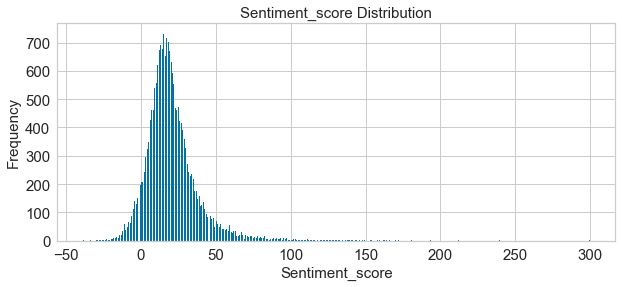

In [210]:
# Plotting histogram with respect to Sentiment_score

plt.figure(figsize=(10,4))
plt.hist(DF['Sentiment_score'],bins=500)
plt.xlabel('Sentiment_score', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Sentiment_score Distribution', fontsize=15)
plt.show()

As by seeing the graph we can say that most of the score are ranging from 10 to 40.

In [49]:
DF1=DF[['Cleaned_Data','Polarity','Sentiment_score']]
DF1.head(5)

,Cleaned_Data,Polarity,Sentiment_score
0,nice hotel expensive parking got good deal sta...,0.21,26
1,ok nothing special charge diamond member hilto...,0.24,37
2,nice rooms not 4 experience hotel monaco seatt...,0.29,23
3,unique great stay wonderful time hotel monaco ...,0.50,39
4,great stay great stay went seahawk game awesom...,0.47,40


In [50]:
def sentiment(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [51]:
DF['Sentiment']=DF['Sentiment_score'].map(lambda x: sentiment(x))
DF.head(2)

,Review,Rating,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization,Polarity,Sentiment_score,Sentiment
0,nice hotel expensive parking got good deal sta...,4.0,593,"['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","[('nice', 'JJ'), ('hotel', 'NN'), ('expensive'...","[('nice', 'a'), ('hotel', 'n'), ('expensive', ...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...,0.21,26,Positive
1,ok nothing special charge diamond member hilto...,2.0,1689,"['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","[('ok', 'JJ'), ('nothing', 'NN'), ('special', ...","[('ok', 'a'), ('nothing', 'n'), ('special', 'a...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...,0.24,37,Positive


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

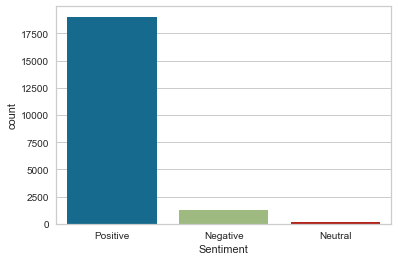

In [281]:
# Visualising with respect to count plot

sns.countplot(DF['Sentiment'])

<AxesSubplot:ylabel='Sentiment'>

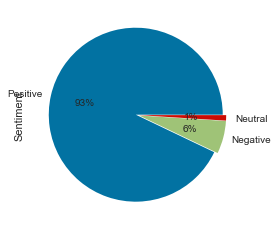

In [282]:
o=DF['Sentiment'].value_counts()
o.plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02])


As by seeing the graph & pie chart we can say that the 'Positive' counts are more as compared to 'Negative' and 'Neutral' counts

#### TF-IDF vectorizer(Term Frequency_Inverse document frequency)

-  Calculating the TF-IDF score for every word in your corpus relative to that document and then putting that information into a vector.
- Improved version of Binary-weights and Bag of words.
- Having two types:
  1. L1 norm = Sum of Absolute values
  2. L2 norm = Sum of Squared values
- Having rang between 0 to 1.  

In [52]:
# Taking the data with respect to 'Positve','Neutral','Negative' data only

Positve=DF[DF['Sentiment']=='Positive']
Neutral=DF[DF['Sentiment']=='Neutral']
Negative=DF[DF['Sentiment']=='Negative']


In [53]:
# Sorting out the data with respect to cleaned data in the form of postive ,negative, and neutral_reviews so that the TF-IDF can apply throught the reviews.

positive_reviews=Positve['Cleaned_Data']
neutral_reviews=Neutral['Cleaned_Data']
negative_reviews=Negative['Cleaned_Data']

In [298]:
# Applying the TF-IDF vectorizer on positive_reviews data

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(positive_reviews)
print(tv.get_feature_names())
print(tf_idf_matrix.toarray())

['00', '00 night', '00 pm', '000', '00am', '00pm', '04', '05', '06', '07', '08', '10', '10 00', '10 15', '10 30', '10 min', '10 mins', '10 minute', '10 minute walk', '10 minutes', '10 minutes walk', '100', '1000', '10am', '10pm', '10th', '11', '11am', '11pm', '11th', '12', '120', '12th', '13', '14', '14th', '15', '15 20', '15 min', '15 mins', '15 minute', '15 minute walk', '15 minutes', '150', '15th', '16', '16th', '17', '18', '18th', '19', '1st', '1st floor', '20', '20 min', '20 mins', '20 minute', '20 minute walk', '20 minutes', '200', '2003', '2004', '2005', '2006', '2007', '2008', '20th', '21', '21st', '22', '23', '23rd', '24', '24 hour', '24 hours', '25', '25th', '26', '27', '28', '29', '2nd', '2nd floor', '2pm', '30', '30 minute', '30 minutes', '30 pm', '300', '30am', '30pm', '30th', '31', '35', '3pm', '3rd', '3rd floor', '40', '40 minutes', '400', '41', '45', '45 minutes', '4pm', '4th', '4th floor', '50', '500', '5pm', '5th', '5th floor', '60', '6am', '6pm', '6th', '6th floor', 

In [299]:
# Applying the TF-IDF vectorizer on neutral_reviews data

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(neutral_reviews)
print(tv.get_feature_names())
print(tf_idf_matrix.toarray())

['00', '00 pm', '000', '00pm', '06', '10', '10 15', '10 minutes', '100', '1000', '10pm', '11', '12', '12 hours', '13', '15', '15 minutes', '16', '17', '18', '18 gratuity', '1929', '1st', '20', '20 minute', '20 minutes', '20 years', '200', '200 night', '2004', '2006', '2007', '2008', '21', '24', '24 hours', '25', '26th', '27th', '2nd', '2pm', '30', '30 minutes', '300', '30am', '3am', '3pm', '3rd', '40', '4pm', '50', '50 euros', '5am', '5th', '5th floor', '65', '70', '72', '800', '800 number', '90', '911', '95', '99', '99 night', 'able', 'able enjoy', 'able sleep', 'absolutely', 'absolutely tiny', 'ac', 'accept', 'access', 'accessible', 'accommodation', 'accommodation hotel', 'accomodating', 'accomodation', 'accomodations', 'accounts', 'activities', 'actual', 'actually', 'add', 'addition', 'adequate', 'adjacent', 'adjoining', 'adjust', 'admit', 'adults', 'advantage', 'advertised', 'advice', 'advice pay', 'advice pay little', 'advise', 'advised', 'advisor', 'afford', 'affordable', 'after'

In [300]:
# Applying the TF-IDF vectorizer on negative_reviews data

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(negative_reviews)
print(tv.get_feature_names())
print(tf_idf_matrix.toarray())

['00', '00 00', '00 morning', '00 night', '00 pm', '000', '00am', '00pm', '03', '06', '07', '08', '10', '10 00', '10 15', '10 15 minutes', '10 30', '10 day', '10 days', '10 mins', '10 minute', '10 minutes', '10 times', '10 year', '10 year old', '10 years', '100', '1000', '10am', '10pm', '11', '11 00', '11 30', '11pm', '12', '12 30', '13', '14', '15', '15 minute', '15 minutes', '150', '16', '17', '18', '19', '1am', '1st', '20', '20 00', '20 min', '20 mins', '20 minute', '20 minutes', '20 years', '200', '2004', '2005', '2006', '2007', '2008', '21', '21st', '22', '23', '23rd', '24', '24 hour', '24 hours', '24th', '25', '250', '27', '28', '2am', '2nd', '2nd floor', '2pm', '30', '30 min', '30 minute', '30 minutes', '30 night', '30 pm', '30 years', '300', '300 00', '30am', '30pm', '35', '36', '38', '3am', '3pm', '3rd', '3rd floor', '40', '400', '45', '45 minutes', '4am', '4th', '4th floor', '50', '50 euro', '500', '55', '5th', '60', '600', '6am', '6pm', '6th', '70', '75', '7am', '7pm', '7th'

#### Bigram for postive_reviews

In [301]:
def get_top_n2_words(corpus, n=None):
    vec1 = TfidfVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [302]:
Positive_Bi_words = get_top_n2_words(positive_reviews, n=200) #top 200
Positive_Bi = pd.DataFrame(Positive_Bi_words)
Positive_Bi.columns=["Bi-gram", "Frequency"]
Positive_Bi.head(5)

,Bi-gram,Frequency
0,did not,711.100651
1,great location,351.719230
2,staff friendly,309.758329
3,great hotel,258.921522
4,ca not,245.667764


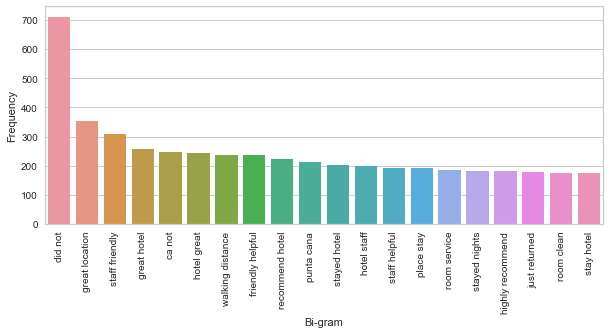

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = Positive_Bi.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Frequency"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#### Bigram for negative_reviews

In [304]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [305]:
from sklearn.feature_extraction.text import CountVectorizer
Negative_Bi_words = get_top_n2_words(negative_reviews, n=200) #top 200
Negative_Bi = pd.DataFrame(Negative_Bi_words)
Negative_Bi.columns=["Bi-gram", "Frequency"]
Negative_Bi.head(5)

,Bi-gram,Frequency
0,did not,727
1,not stay,181
2,room not,130
3,not work,119
4,hotel not,110


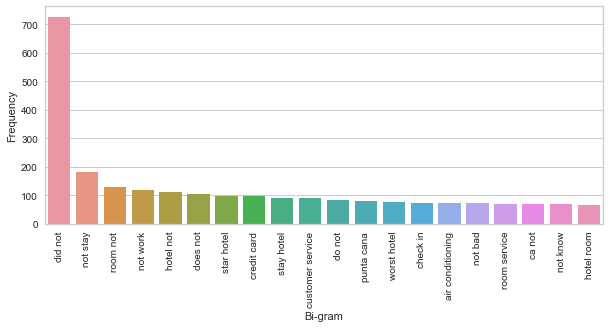

In [306]:
#Bi-gram plot with respect to negative_reviews
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = Negative_Bi.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Frequency"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#### Trigram for positive_reviews

In [307]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [309]:
Postive_Tri_words = get_top_n3_words(positive_reviews, n=200)
Postive_Tri = pd.DataFrame(Postive_Tri_words)
Postive_Tri.columns=["Tri-gram", "Frequency"]
Postive_Tri.head(5)

,Tri-gram,Frequency
0,staff friendly helpful,760
1,hotel great location,549
2,old san juan,350
3,did not want,345
4,highly recommend hotel,321


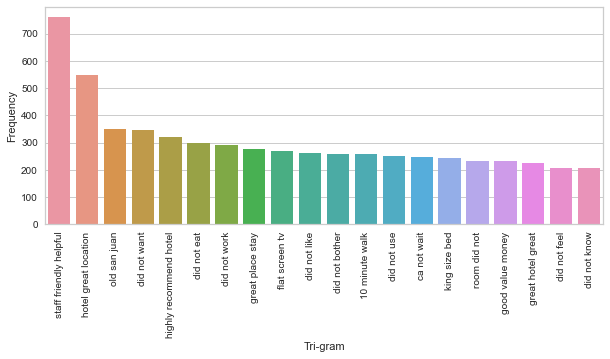

In [310]:
import seaborn as sns
top20_trigram = Postive_Tri.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Frequency"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

#### Trigram for negative_reviews

In [311]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [312]:
Negative_tri_words = get_top_n3_words(negative_reviews, n=200)
Negative_tri = pd.DataFrame(Negative_tri_words)
Negative_tri.columns=["Tri-gram", "Frequency"]
Negative_tri.head(5)

,Tri-gram,Frequency
0,did not work,96
1,room did not,41
2,did not want,33
3,worst hotel stayed,29
4,not stay hotel,27


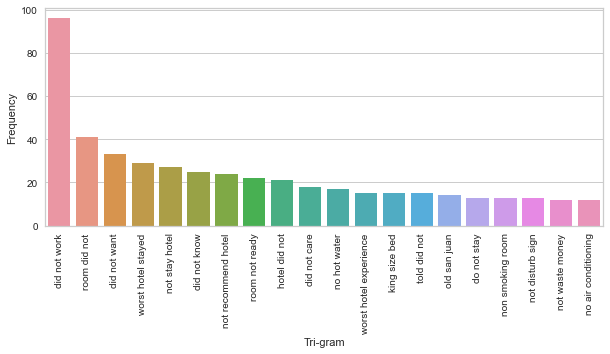

In [313]:
import seaborn as sns
top20_trigram = Negative_tri.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Frequency"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [315]:
DF.head(2)

,Review,Rating,Length of text,No_Contraction,Join_contraction,Tokenized,Lower_case,No_punctuation,Cleaned_Data,Cleandata_Tokenized,Stopwords_removed,Parts of speech_tags,Wordnet_pos,Stoppedwords_join,Stemming,Lemmatization,Polarity,Sentiment_score,Sentiment
0,nice hotel expensive parking got good deal sta...,4.0,593,"['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...",nice hotel expensive parking got good deal sta...,"['nice', 'hotel', 'expensive', 'parking', 'got...","['nice', 'hotel', 'expensive', 'parking', 'got...","[('nice', 'JJ'), ('hotel', 'NN'), ('expensive'...","[('nice', 'a'), ('hotel', 'n'), ('expensive', ...",nice hotel expensive parking got good deal sta...,nice hotel expens park got good deal stay hote...,nice hotel expensive parking got good deal sta...,0.21,26,Positive
1,ok nothing special charge diamond member hilto...,2.0,1689,"['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...",ok nothing special charge diamond member hilto...,"['ok', 'nothing', 'special', 'charge', 'diamon...","['ok', 'nothing', 'special', 'charge', 'diamon...","[('ok', 'JJ'), ('nothing', 'NN'), ('special', ...","[('ok', 'a'), ('nothing', 'n'), ('special', 'a...",ok nothing special charge diamond member hilto...,ok noth special charg diamond member hilton de...,ok nothing special charge diamond member hilto...,0.24,37,Positive


In [316]:
# Saving the data
# DF.to_csv('finaldata.csv',index=True)